### Regressão não-linear:
A <u>regressão não-linear</u> pelo método dos mínimos quadrados é um processo iterativo que envolve, entre outras coisas, aproximar o modelo não-linear para um modelo linear para o cálculo do gradiente (necessário para encontrar um conjunto de bons parâmetros). Por conta das aproximações e do processo iterativo, a solução deste problema também *depende do palpite inicial para os parâmetros do modelo*. Em outras palavras, se você tem um modelo não-linear com 3 parâmetros {$a$, $b$ e $c$}, então os valores de convergência para esses parâmetros vão depender do valor inicial dos mesmos que você escolheu antes de iniciar o processo iterativo.

Para calcular a regressão linear dos nossos dados obtidos no dls, vamos utilizar o modelo:
XXXXXXX

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from lmfit import Model
import pandas as pd

In [82]:
cor07 = pd.read_csv('dados\ID07 - correlograma.txt')
cor05 = pd.read_csv('dados\ID05 - Correlograma.txt')

### Amostra 0.7

In [83]:
# dados amostra 07
df2 = pd.read_csv('dados\ID07 - correlograma.txt', sep="\t")

In [84]:
# amostra 07
x1 = list(df2["Time (µs) - ID07 [Steady state]"]*1E-6) #[0:250]
y1 = list(df2["Correlation Coefficient (g₂-1) - ID07 [Steady state]"])
temp07 = x1 [0:250]
co07 = y1 [0:250]

Text(0, 0.5, 'coeficiente de correlação')

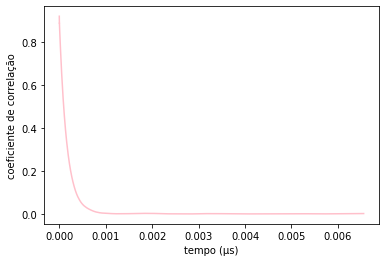

In [85]:
# gráfico amostra 07
plt.plot(temp07, co07, label = "gráfico de correlação 07", color = "pink")
plt.xlabel('tempo (µs)')
plt.ylabel('coeficiente de correlação')

In [86]:
def Dt(d, eta):
    x = 1.38e-23 * 300/(3*np.pi*eta*d)
    return x

eta = 8.9e-4 #PaS
n = 1.33 
lamb = 5.32e-7 #m
q = ((4*(np.pi)*n)/lamb)*(np.sin(np.pi/4)) 
dte = Dt(100e-9, eta) #dt estimado
Aest = -2*(q**2)*dte
print(Aest)

def rxx(t, b, A):
    corr = b*np.exp(-A*t)
    return corr

-4871.233552757208


In [87]:
from lmfit import Model

modelo_rxx = Model(rxx)

print(f'Variável independente: {modelo_rxx.independent_vars}')
print(f'Parâmetros do modelo: {modelo_rxx.param_names}')

Variável independente: ['t']
Parâmetros do modelo: ['b', 'A']


In [88]:
params = modelo_rxx.make_params(b=1, A=-3.808190901874423e-16)

In [89]:
resultado_fit = modelo_rxx.fit(co07, params, t=temp07)
print(resultado_fit.fit_report())

[[Model]]
    Model(rxx)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 28
    # data points      = 250
    # variables        = 2
    chi-square         = 0.00340864
    reduced chi-square = 1.3745e-05
    Akaike info crit   = -2796.72579
    Bayesian info crit = -2789.68287
[[Variables]]
    b:  0.90340442 +/- 3.5232e-04 (0.04%) (init = 1)
    A:  6219.34284 +/- 11.6757758 (0.19%) (init = -3.808191e-16)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, A) =  0.415


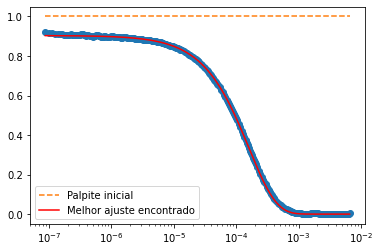

In [90]:
plt.plot(temp07, co07, 'o')
plt.plot(temp07, resultado_fit.init_fit, '--', label='Palpite inicial')
plt.plot(temp07, resultado_fit.best_fit, '-', label='Melhor ajuste encontrado',c = 'r')
plt.semilogx()
plt.legend()
plt.show()

In [91]:
Ares = 6219.34284
d = 2*q*q*(1.38e-23)*300/(3*np.pi*eta*Ares)
print('tamanho (m) :',d)

tamanho (m) : 7.832392711055639e-08


## Amostra 0.5

In [92]:
# para dados da amostra 05
df = pd.read_csv('dados\ID05 - Correlograma.txt', sep="\t")

In [93]:
# amostra 05
x = list(df["Time (µs) - ID05 [Steady state]"]*1E-6)
y = list(df["Correlation Coefficient (g₂-1) - ID05 [Steady state]"])
temp05 = x[0:250]
co05 = y[0:250]

Text(0, 0.5, 'coeficiente de correlação')

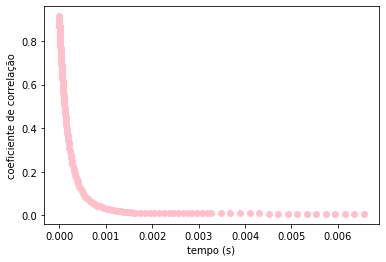

In [94]:
# gráfico amostra 05
plt.plot(temp05, co05, "o", label = "gráfico de correlação", color = "pink")
plt.xlabel('tempo (s)')
plt.ylabel('coeficiente de correlação')

In [95]:
resultado_fit = modelo_rxx.fit(co05, params, t=temp05)
print(resultado_fit.fit_report())

[[Model]]
    Model(rxx)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 250
    # variables        = 2
    chi-square         = 0.03488339
    reduced chi-square = 1.4066e-04
    Akaike info crit   = -2215.30136
    Bayesian info crit = -2208.25844
[[Variables]]
    b:  0.88527732 +/- 0.00109856 (0.12%) (init = 1)
    A:  4825.78523 +/- 29.4502827 (0.61%) (init = -3.808191e-16)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, A) =  0.406


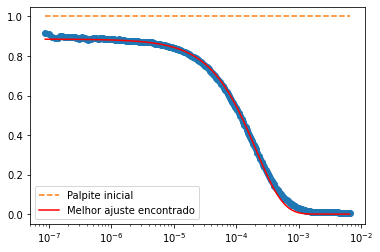

In [98]:
plt.plot(temp05, co05, 'o')
plt.plot(temp05, resultado_fit.init_fit, '--', label='Palpite inicial')
plt.plot(temp05, resultado_fit.best_fit, '-', label='Melhor ajuste encontrado',c = 'r')
plt.semilogx()
plt.legend()
plt.show()

In [99]:
Ares = 4825.78523
d = 2*q*q*(1.38e-23)*300/(3*np.pi*eta*Ares)
print('tamanho (m) :',d)

tamanho (m) : 1.0094178088313323e-07
